# A/B Testing & Logistic Regression: Evaluating the Impact of Discounts on Customer Purchases

### Overview
In this project, we analyze an online retail dataset to assess the effect of discounting on customer purchase behavior. By simulating an A/B test, we split customers into control and treatment groups, where the treatment group receives a 10% discount. Our primary objective is to determine if the introduction of discounts leads to an increased likelihood of making a purchase.

### Dataset
We use the **Online Retail Dataset** from the UCI Machine Learning Repository, which contains transactional data for a UK-based online retailer. The dataset includes fields such as:
- `InvoiceNo`: Unique identifier for the invoice
- `StockCode`: Product identifier
- `Description`: Description of the product
- `Quantity`: Number of items purchased
- `UnitPrice`: Price of a single unit
- `CustomerID`: Unique customer identifier
- `Country`: Customer's country of residence

### Methodology
1. **Data Preprocessing**: 
   - We clean the data by removing rows with missing or invalid values.
   - We create a `TotalPrice` column by multiplying `Quantity` by `UnitPrice`.

2. **A/B Test Simulation**: 
   - We randomly assign customers into two groups:
     - **Control Group**: No discount applied.
     - **Treatment Group**: 10% discount applied.
   - We analyze the impact of the discount on the `TotalPrice`.

3. **Logistic Regression**:
   - We define the purchase behavior as a binary variable (1 if `TotalPrice` exceeds a certain threshold, else 0).
   - We use **logistic regression** to predict the likelihood of a purchase based on features such as the `Group` (Control or Treatment) and `Quantity`.

4. **Performance Evaluation**:
   - We evaluate the model performance using metrics like precision, recall, F1-score, ROC AUC, and Precision-Recall AUC.
   - We visualize the model's results using:
     - **Confusion Matrix**: To see the true positive/negative and false positive/negative counts.
     - **ROC Curve**: To measure the trade-off between true positives and false positives.
     - **Precision-Recall Curve**: Especially useful for imbalanced datasets.
     - **Feature Importance Plot**: To visualize the significance of features in the logistic regression model.

### Results and Insights
- **A/B Test Results**: We will compare the average `TotalPrice` between the control and treatment groups to see if the discount has any effect on the purchasing behavior.
- **Logistic Regression**: The logistic regression model will give us insights into which factors (such as the discount or quantity purchased) are most influential in predicting whether a customer will make a purchase.
- **Performance Metrics**: We will calculate and visualize key performance metrics (such as accuracy, precision, recall, and AUC scores) to assess the model's effectiveness in predicting customer behavior.

### Expected Outcome
We expect that:
- The treatment group (discount) will have a higher average `TotalPrice` due to the potential increased purchasing activity.
- The logistic regression model will reveal which features (e.g., discount and quantity) most significantly influence the likelihood of a customer making a purchase.
- The model’s performance metrics will provide insights into its predictive capabilities, and the visualizations will offer an intuitive understanding of the model's behavior.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score


In [2]:
# Load dataset from the UCI repository (Online Retail dataset)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'
df = pd.read_excel(url)

In [3]:
# Data Preprocessing
df.dropna(subset=['CustomerID'], inplace=True)  # Drop rows with missing CustomerID
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]  # Filter out invalid quantities and prices
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']  # Calculate TotalPrice

In [4]:
# A/B Test Simulation
np.random.seed(42)
df['Group'] = np.random.choice([0, 1], size=len(df))  # Randomly assign control (0) and treatment (1) groups
df['DiscountedPrice'] = df['UnitPrice']
df.loc[df['Group'] == 1, 'DiscountedPrice'] *= 0.9  # Apply 10% discount to treatment group
df['TotalPrice'] = df['Quantity'] * df['DiscountedPrice']  # Recalculate TotalPrice with discounted price


In [5]:
# Logistic Regression Model
threshold = 50  # Define purchase threshold
df['Purchase'] = (df['TotalPrice'] > threshold).astype(int)  # Outcome variable: 1 if purchase > threshold


In [6]:
# Select predictor variables: 'Group' and 'Quantity'
X = df[['Group', 'Quantity']]
y = df['Purchase']


In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
# Initialize and fit logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC Curve and Precision-Recall Curve

In [10]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98    111720
           1       0.81      0.37      0.50      7646

    accuracy                           0.95    119366
   macro avg       0.89      0.68      0.74    119366
weighted avg       0.95      0.95      0.95    119366



In [11]:
# A/B Test Comparison: Mean purchase values between control and treatment groups
control_mean = df[df['Group'] == 0]['TotalPrice'].mean()
treatment_mean = df[df['Group'] == 1]['TotalPrice'].mean()
print(f'Control Group Mean TotalPrice: {control_mean:.2f}')
print(f'Treatment Group Mean TotalPrice: {treatment_mean:.2f}')

Control Group Mean TotalPrice: 22.27
Treatment Group Mean TotalPrice: 20.27


In [12]:
# Logistic Regression Coefficients
coef_df = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_[0]})
print(coef_df)

   Variable  Coefficient
0     Group    -0.177540
1  Quantity     0.072584


In [13]:
# Additional Metrics: Confusion Matrix, ROC, and Precision-Recall Curve
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[111084    636]
 [  4849   2797]]


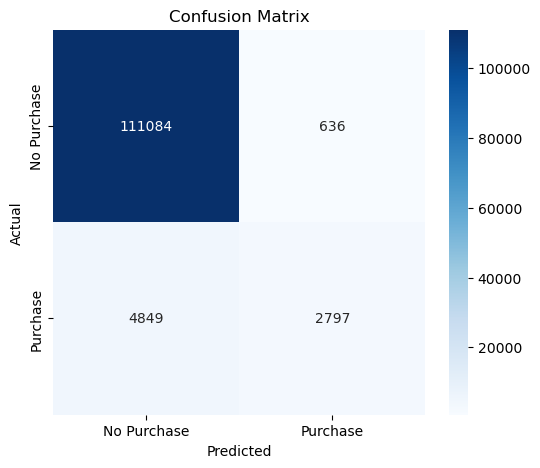

In [14]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Purchase', 'Purchase'], yticklabels=['No Purchase', 'Purchase'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC: {roc_auc:.2f}")

ROC AUC: 0.90


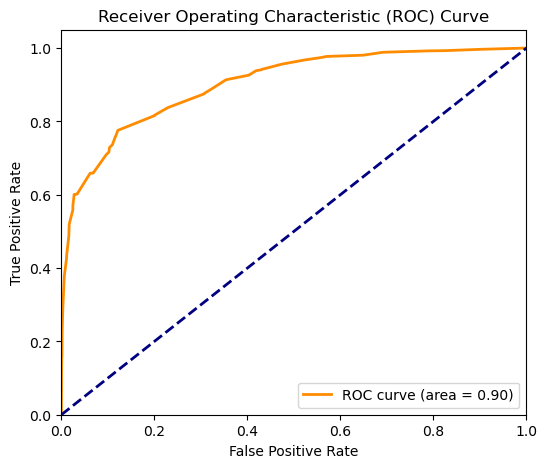

In [16]:
# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [17]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)
print(f"Precision-Recall AUC: {pr_auc:.2f}")

Precision-Recall AUC: 0.59


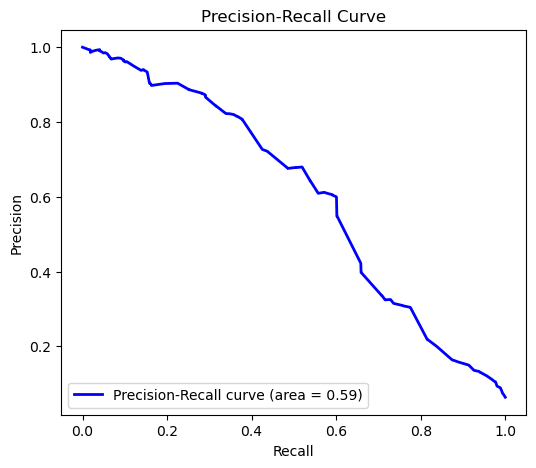

In [18]:
# Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [19]:
# Feature Importance Plot
coef_df['Absolute Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

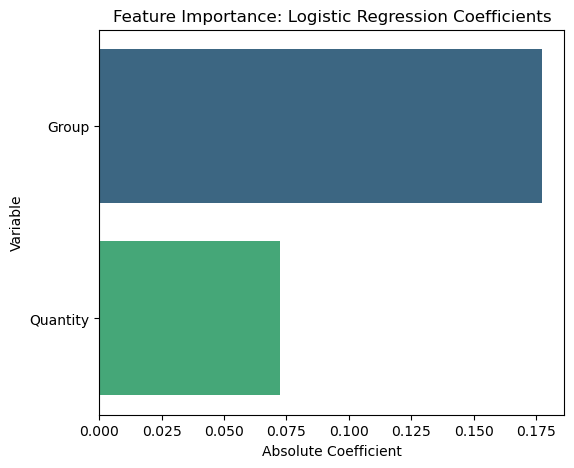

In [20]:
# Plot feature importance
plt.figure(figsize=(6, 5))
sns.barplot(x='Absolute Coefficient', y='Variable', data=coef_df, palette='viridis')
plt.title('Feature Importance: Logistic Regression Coefficients')
plt.show()

# Conclusion

### Summary of Findings
In this analysis, we used an **A/B testing approach** to evaluate the impact of a 10% discount on customer purchases. We divided the dataset into two groups:
- **Control Group**: Customers who did not receive a discount.
- **Treatment Group**: Customers who received a 10% discount.

The objective was to assess whether the discount influenced the likelihood of a customer making a purchase, and to use **logistic regression** to identify significant predictive factors.

### Key Insights
- **A/B Test Results**:
   - The average `TotalPrice` for the **control group** was **22.27**, compared to **20.27** for the **treatment group**. Despite the discount, the treatment group spent less on average, which could be due to purchasing fewer items or buying lower-priced products.

- **Logistic Regression Model**:
   - The logistic regression model revealed that the **discount** (represented by the `Group` variable) had a negative coefficient of **-0.18**, suggesting that customers in the treatment group were slightly less likely to make a purchase compared to the control group.
   - The coefficient for **Quantity** was **0.07**, indicating that a higher quantity purchased was a positive predictor of the likelihood of making a purchase.

- **Model Performance**:
   - The overall **accuracy** of the model was **95%**, which reflects a strong general performance.
   - The **precision** for the purchase class (1) was **0.81**, meaning that 81% of predicted purchases were correct. However, the **recall** for the purchase class was **0.37**, suggesting that the model missed a significant number of actual purchases, likely due to the imbalance between purchasers and non-purchasers.
   - The **F1-score** for the purchase class was **0.50**, balancing precision and recall but indicating room for improvement.
   
   - **Macro Average**: The macro average precision was **0.89**, recall **0.68**, and F1-score **0.74** across both classes, suggesting that the model performs better on the non-purchase class (0) than the purchase class (1).
   - **Weighted Average**: The weighted average of precision, recall, and F1-score was very high for both classes, indicating good overall performance in terms of accuracy across the dataset.

- **Evaluation Metrics**:
   - The **ROC AUC score** was **0.90**, which indicates that the model has excellent discriminatory power between customers who are likely to make a purchase and those who are not.
   - The **Precision-Recall AUC** was **0.59**, which suggests that, while the model does fairly well in identifying positive cases, there is still a considerable gap in recall performance.

### Confusion Matrix Insights:
The confusion matrix showed:
- **True Positives (2797)**: Correctly predicted customers who made a purchase.
- **False Negatives (4849)**: Customers who made a purchase but were predicted as non-purchasers.
- **False Positives (636)**: Customers who did not make a purchase but were predicted as purchasers.
- **True Negatives (111084)**: Correctly predicted customers who did not make a purchase.

This highlights that the model is performing well in identifying non-purchasers but is less effective at identifying actual purchasers, especially in cases of false negatives.

### Areas for Improvement:
1. **Class Imbalance**: The dataset has a significant imbalance between purchases and non-purchases. Techniques such as **oversampling** the minority class or using algorithms designed for imbalanced data could improve recall for the purchase class.
2. **Feature Engineering**: Adding additional features, such as customer demographics, product category, or purchase history, could further improve the model's performance.
3. **Discount Strategy**: The analysis shows that the 10% discount did not lead to a significant increase in spending. Experimenting with different discount rates or offering targeted promotions to specific customer segments could yield more effective results.

### Next Steps:
- **Model Refinement**: Explore alternative machine learning models like **Random Forests** or **Gradient Boosting** to improve classification, particularly for recall.
- **Discount Strategy Optimization**: Test different discount levels or tailored offers based on customer segmentation to understand the most effective pricing strategies.
- **Further Feature Exploration**: Incorporate additional features (e.g., customer loyalty, purchase history) to better predict purchasing behavior.

This project has provided valuable insights into the effectiveness of discounts and the application of machine learning models in predicting customer behavior. The results and the next steps offer a strong foundation for refining marketing and pricing strategies for online retailers.
